In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Cause plots to be displayed in the notebook:
%matplotlib inline

In [44]:
from energy_functions import twoD_Gaussian,coupled_oscillator_energy_force

In [52]:
from optimize_functions import local_minimization,perturb_coordinates,acceptance_probability,basin_hopping

store info about local minima in arrays

In [119]:

# create local minima

np.random.seed(42)

nlocalminima=100
amps=np.zeros((nlocalminima))
offsets=np.zeros((nlocalminima))
xy0=np.zeros((nlocalminima,2))
sigma_xy=np.zeros((nlocalminima,2))
thetas=np.zeros((nlocalminima))


for i in range(nlocalminima):
    amps[i]=-10*np.abs(np.random.randn())
    offsets[i]=0 #-1*np.abs(np.random.randn())
    xy0[i,:]=4*np.random.rand(2)-2
    sigma_xy[i,:]=0.1*np.random.rand(2)
    thetas[i]=np.pi*np.random.randn()

<a list of 114 text.Text objects>

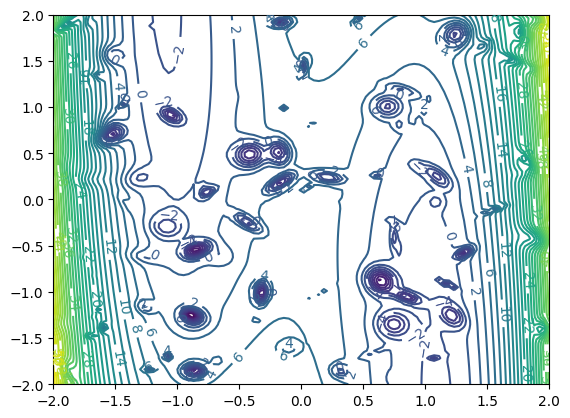

In [120]:
xmin,xmax=-2,2
x_points = np.linspace(-2,2,100)
y_points = np.linspace(-2,2,100)
X, Y = np.meshgrid(x_points, y_points)  
energies, xforces, yforces = coupled_oscillator_energy_force(X,Y,d0=5,a=1.0,k=1.0,lamb=2.078)
# this generate a surface for plotting local minima 
nx=np.zeros((100,100)) 
for i in range(nlocalminima):
    xo,yo=xy0[i,:]
    sigma_x,sigma_y=sigma_xy[i,:]
    nx=nx+twoD_Gaussian(X, Y, amps[i], xo, yo, sigma_x, sigma_y, thetas[i], offsets[i])
Z= nx + energies # nx
CS = plt.contour(X, Y, Z, levels=50)
plt.clabel(CS, inline=1, fontsize=10)

In [121]:
# redefine energy function so it takes in x,y as a vector 
def pes(x1,nlocalminima=nlocalminima,amps=amps,offsets=offsets,xy0=xy0,sigma_xy=sigma_xy,thetas=thetas,**kwargs):
    x,y=x1
    ene1,_,_=coupled_oscillator_energy_force(x,y,d0=5,a=1.0,k=1.0,lamb=2.078)
    nx=0
    for i in range(nlocalminima):
        xo,yo=xy0[i,:]
        sigma_x,sigma_y=sigma_xy[i,:]
        nx=nx+twoD_Gaussian(x, y, amps[i], xo, yo, sigma_x, sigma_y, thetas[i], offsets[i])
    return ene1+nx

(2, 100, 100)
<class 'numpy.ndarray'>


<a list of 190 text.Text objects>

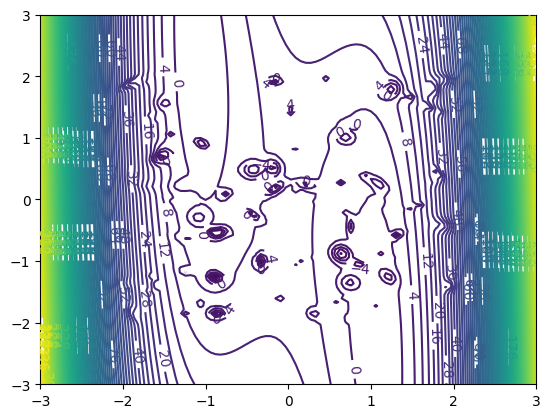

In [122]:
xmin,xmax=-3,3
x_points = np.linspace(xmin,xmax,100)
y_points = np.linspace(xmin,xmax,100)
X, Y = np.meshgrid(x_points, y_points)
XY=np.vstack([[X],[Y]])
print(np.shape(XY))
print(type(XY[:,0,0]))
Z=pes(XY)
CS = plt.contour(X, Y, Z, levels=100)
plt.clabel(CS, inline=1, fontsize=10)

In [188]:
X0=4*np.random.rand(2)-2
# X0=np.array([0.2,-1.2])
X0=np.array([1.8,0])
print(X0)
print(pes(X0))
fin,traj=basin_hopping(X0,pes, niter=200, stepsize=0.1, temperature=50.5)
# print(traj)

[1.8 0. ]
25.084420568176498


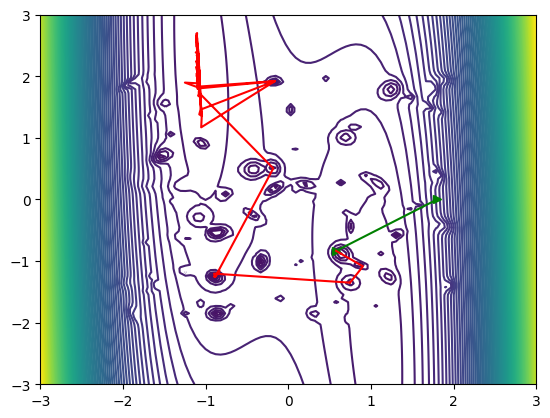

In [189]:

CS = plt.contour(X, Y, Z, levels=100)
CS = plt.plot([X0[0],traj[0,0]],[X0[1],traj[0,1]],'g>',linestyle='-')
CS = plt.plot(traj[:,0],traj[:,1],'r-')

In [190]:
X0=4*np.random.rand(2)-2
# X0=np.array([0.2,-1.2])
X0=np.array([1.8,0])
print(X0)
print(pes(X0))
fin,traj=basin_hopping(X0,pes, niter=200, stepsize=0.1, temperature=50.0)

[1.8 0. ]
25.084420568176498


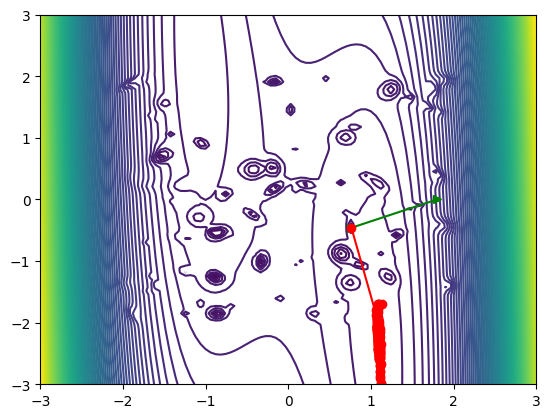

In [191]:
CS = plt.contour(X, Y, Z, levels=100)
CS = plt.plot([X0[0],traj[0,0]],[X0[1],traj[0,1]],'g>',linestyle='-')
CS = plt.plot(traj[:,0],traj[:,1],'ro',linestyle='-')